##**Assignment-3, Question -1**

####**Importing the libraries and dataset:**
#####There are a total of 60,000 data out of which 50k examples are training dataset and 10k in the test dataset and the images are 32×32 pixels and color, with three channels(RGB):

In [ ]:
# Loading the cifar10 dataset
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import cifar10 # Used to import the dataset
from keras.utils import np_utils    # To transfor labels into categorical
import numpy as np
import time # To calculate the time taken to train the model

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# summarize loaded dataset, X_train,X_test=(no_of _samples,pixel resolution,pixel resolution,RGB channel); y_train,y_test=(no_of_samples,1)
# Training Dataset: The sample of data used to fit the model.
print(X_train.shape)
print(y_train.shape)
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [ ]:
#Splitting the Test dataset into Validation and test (50% each):
from sklearn.model_selection import train_test_split

X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)
print(X_test.shape, X_valid.shape, y_test.shape, y_valid.shape)

(5000, 32, 32, 3) (5000, 32, 32, 3) (5000, 1) (5000, 1)


###**Part-1 MLP Network:**

In [ ]:
#Normalizing the pixel value of images to be in range of 0 and 1:
X_train_mlp = X_train/255
X_test_mlp = X_test/255
X_valid_mlp = X_valid/255

#One hot encoding for the dataset categories, there are 10 different classes and they are represented with unique integers.
classes = 10
epoch = 5
y_train_mlp = np_utils.to_categorical(y_train,classes)
y_test_mlp = np_utils.to_categorical(y_test,classes)
y_valid_mlp = np_utils.to_categorical(y_valid,classes)


print("X_train.shape = ", X_train_mlp.shape)
print("y_train.shape = ", y_train_mlp.shape, y_test_mlp.shape, y_valid_mlp.shape)
#class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
#               'dog', 'frog', 'horse', 'ship', 'truck']

#Randomly sampling 20% of the training dataset:

Rand_train = np.random.rand(len(X_train_mlp)) < 0.2
D = int(X_train_mlp.shape[0] * 0.2)
print("D : Rows of X_train", D)

X_train_mlp = X_train_mlp[:D]
y_train_mlp = y_train_mlp[:D]

print("20% X_train.shape = ", X_train_mlp.shape)
print("20% y_train.shape = ", y_train_mlp.shape)

print("20% X_test.shape = ", X_test_mlp.shape)
print("20% y_test.shape = ", y_test_mlp.shape)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train_mlp = np.reshape(X_train_mlp,(10000,3072))
X_test_mlp = np.reshape(X_test_mlp,(5000,3072))
X_valid_mlp = np.reshape(X_valid_mlp,(5000,3072))
X_train_mlp = X_train_mlp.astype('float32')
X_test_mlp = X_test_mlp.astype('float32')
X_valid_mlp = X_valid_mlp.astype('float32')

print("After reshape X_train_mlp.shape = ", X_train_mlp.shape)
print("After reshape X_test_mlp.shape = ", X_test_mlp.shape)
print("After reshape X_valid_mlp.shape = ", X_valid_mlp.shape)

X_train.shape =  (50000, 32, 32, 3)
y_train.shape =  (50000, 10) (5000, 10) (5000, 10)
D : Rows of X_train 10000
20% X_train.shape =  (10000, 32, 32, 3)
20% y_train.shape =  (10000, 10)
20% X_test.shape =  (5000, 32, 32, 3)
20% y_test.shape =  (5000, 10)
After reshape X_train_mlp.shape =  (10000, 3072)
After reshape X_test_mlp.shape =  (5000, 3072)
After reshape X_valid_mlp.shape =  (5000, 3072)


In [ ]:
mlp_network = tf.keras.models.Sequential()

#Step 1 : 1st fully connected layer with 512 units and sigmoid act function:
mlp_network.add(tf.keras.layers.Dense(units=512, activation='sigmoid', input_dim = 3072))

#Step 2 : 2nd fully connected layer with 512 units and sigmoid act function:
mlp_network.add(tf.keras.layers.Dense(units=512, activation='sigmoid'))

mlp_network.add(tf.keras.layers.Dense(units=512, activation='sigmoid'))
#mlp_network.add(tf.keras.layers.Dense(units=256, activation='sigmoid'))

#mlp_network.add(tf.keras.layers.BatchNormalization())

#Step 3 : Output layer, since the number of classes are 10, units=10.

mlp_network.add(tf.keras.layers.Dense(units=10, activation='softmax'))



In [ ]:
mlp_network.summary()

In [ ]:

# Compiling and Training the MLP:
# Using Adam optimizer to complie the CNN network:
# Adam - to perform stochastic gradient decent and updating the weights in order to reduce the loss between the predictions and the target
#A_optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
mlp_network.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#print(y_test_mlp.shape)
#print(y_valid_mlp.shape)
'''
# Step to increase accuracy - Data augumentation:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(X_train_mlp)
'''
print("Training of MLP model(softmax act fn): ")
print("3 Layers with 256 units in each layer:")
# Lets calulcate the time taken to train the MLP model:
initial_time = time.time()

mlp_history = mlp_network.fit(X_train_mlp, y_train_mlp, epochs=5, batch_size=32,
                    validation_data=(X_valid_mlp, y_valid_mlp))
                  
'''
# fits the model on batches with real-time data augmentation:
cnn_network.fit(datagen.flow(X_train_mlp, y_train_mlp, batch_size=32), epochs=5, validation_data=(X_valid_mlp, y_valid_mlp))
'''
end_time = time.time()

time_taken_to_train = (end_time - initial_time)
#print(time_taken_to_train)
print("Time taken to train MLP model is = {:0.2f} minute".format(time_taken_to_train/60.00))

Training of MLP model(softmax act fn): 
3 Layers with 256 units in each layer:
Epoch 1/5
313/313 [==============================] - 6s 21ms/step - loss: 2.1223 - accuracy: 0.1978 - val_loss: 1.9803 - val_accuracy: 0.2612
Epoch 2/5
313/313 [==============================] - 6s 20ms/step - loss: 1.9582 - accuracy: 0.2703 - val_loss: 1.9660 - val_accuracy: 0.2910
Epoch 3/5
313/313 [==============================] - 7s 21ms/step - loss: 1.8905 - accuracy: 0.3034 - val_loss: 1.9641 - val_accuracy: 0.2674
Epoch 4/5
313/313 [==============================] - 7s 22ms/step - loss: 1.8508 - accuracy: 0.3177 - val_loss: 1.9482 - val_accuracy: 0.2818
Epoch 5/5
313/313 [==============================] - 6s 20ms/step - loss: 1.8107 - accuracy: 0.3325 - val_loss: 1.8501 - val_accuracy: 0.3236
Time taken to train MLP model is = 0.56 minute


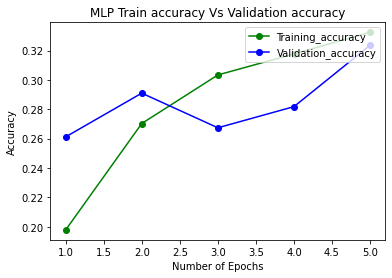

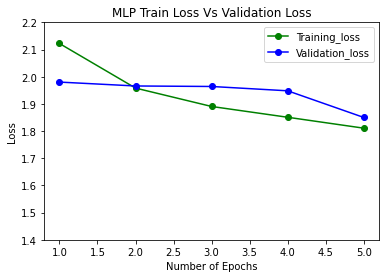

In [ ]:
# Visualization of the training accuracy and Validation accuracy:
train_loss = mlp_history.history['accuracy']
valid_loss = mlp_history.history['val_accuracy']

epochs = range(1,6)
plt.plot(epochs, train_loss, marker='o', color='green', label='Training accuracy')
plt.plot(epochs, valid_loss, marker='o', color='blue', label='validation accuracy')

plt.title('MLP Train accuracy Vs Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['Training_accuracy','Validation_accuracy'],loc='upper right')
plt.show()


# Visualization of the training loss and Validation loss:
train_loss = mlp_history.history['loss']
valid_loss = mlp_history.history['val_loss']

epochs = range(1,6)
plt.ylim(1.4, 2.2)
plt.plot(epochs, train_loss, marker='o', color='green', label='Training loss')
plt.plot(epochs, valid_loss, marker='o', color='blue', label='validation loss')

plt.title('MLP Train Loss Vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Training_loss','Validation_loss'],loc='upper right')
plt.show()

In [ ]:
# Evaluating the MLP model's performance using the testing samples:
score = mlp_network.evaluate(X_test_mlp, y_test_mlp, batch_size=32, verbose=1)

print(mlp_network.metrics_names)
print(score)
print("MLP model - Testing loss = {:2f}".format(score[0]))
print("MLP model - Testing accuracy = {:2f}".format(score[1]*100))


157/157 [==============================] - 1s 7ms/step - loss: 1.8333 - accuracy: 0.3324
['loss', 'accuracy']
[1.8332831859588623, 0.33239999413490295]
MLP model - Testing loss = 1.833283
MLP model - Testing accuracy = 33.239999


#**Part-2  CNN Network-1 Implementation**





###**Importing the libraries and the dataset part are already done in the initial stage of this .ipynb file**


In [ ]:
#Normalizing the pixel value of images to be in range of 0 and 1:
X_train_cnn1 = X_train/255
X_test_cnn1 = X_test/255
X_valid_cnn1 = X_valid/255

#One hot encoding for the dataset categories
classes = 10
epoch = 5
y_train_cnn1 = np_utils.to_categorical(y_train,classes)
y_test_cnn1 = np_utils.to_categorical(y_test,classes)
y_valid_cnn1 = np_utils.to_categorical(y_valid,classes)

print("X_train_cnn1.shape = ", X_train_cnn1.shape)
print("y_train_cnn1.shape = ", y_train_cnn1.shape, y_test_cnn1.shape)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#Randomly sampling 20% of the training dataset:
D = int(X_train_cnn1.shape[0] * 0.2)
print("D : Rows of X_train_cnn1", D)

X_train_cnn1 = X_train_cnn1[:D]
y_train_cnn1 = y_train_cnn1[:D]

print("20% X_train_cnn1.shape = ", X_train_cnn1.shape)
print("20% y_train_cnn1.shape = ", y_train_cnn1.shape)

print("20% X_test_cnn1.shape = ", X_test_cnn1.shape)
print("20% y_test_cnn1.shape = ", y_test_cnn1.shape)

X_train_cnn1.shape =  (50000, 32, 32, 3)
y_train_cnn1.shape =  (50000, 10) (5000, 10)
D : Rows of X_train_cnn1 10000
20% X_train_cnn1.shape =  (10000, 32, 32, 3)
20% y_train_cnn1.shape =  (10000, 10)
20% X_test_cnn1.shape =  (5000, 32, 32, 3)
20% y_test_cnn1.shape =  (5000, 10)


###**Creating the architecture of the CNN network by building sequence of layers**

In [ ]:
cnn1_network = tf.keras.models.Sequential()

#Step 1 : building the 1st convolution layer with 64 filters (size of 3x3) and ReLU activation function:
cnn1_network.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

#Step 2 : building the 2nd convolution layer with 64 filters (size of 3x3) and ReLU activation function:
#Padding=same ,will pad zeores to the padding layer, whereas valid option just ignores the padding layer.
cnn1_network.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

#Step 3 : Flattening the data and 2 fully connected layers:
cnn1_network.add(tf.keras.layers.Flatten())
cnn1_network.add(tf.keras.layers.Dense(units=512, activation='sigmoid'))
cnn1_network.add(tf.keras.layers.Dense(units=512, activation='sigmoid'))

#Step 4 : Building the Output layer, there are 10 classes - hence the number of neurons is 10 for classification:
cnn1_network.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
cnn1_network.summary()

###**Training the CNN1 Network**

In [ ]:
#Using Adam optimizer to complie the CNN network:
#Adam - to perform stochastic gradient decent and updating the weights in order to reduce the loss between the predictions and the target
cnn1_network.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#print(y_test.shape)
print("Training of CNN-1 Network model(sigmoid act fn): ")

## Lets calulcate the time taken to train the MLP model:
initial_time = time.time()
cnn1_history = cnn1_network.fit(X_train_cnn1, y_train_cnn1, epochs=5
                                , batch_size=32,
                    validation_data=(X_valid_cnn1, y_valid_cnn1))
end_time = time.time()
time_taken_to_train = (end_time - initial_time)
#print(time_taken_to_train)
print("Time taken to train CNN-1 Network model is = {:0.2f} minute".format(time_taken_to_train/60.00))

Training of CNN-1 Network model(sigmoid act fn): 
Epoch 1/5
313/313 [==============================] - 169s 540ms/step - loss: 1.8107 - accuracy: 0.3247 - val_loss: 1.5310 - val_accuracy: 0.4402
Epoch 2/5
313/313 [==============================] - 169s 540ms/step - loss: 1.3640 - accuracy: 0.5069 - val_loss: 1.5010 - val_accuracy: 0.4688
Epoch 3/5
313/313 [==============================] - 173s 552ms/step - loss: 1.0436 - accuracy: 0.6254 - val_loss: 1.3391 - val_accuracy: 0.5216
Epoch 4/5
313/313 [==============================] - 169s 539ms/step - loss: 0.6876 - accuracy: 0.7607 - val_loss: 1.3496 - val_accuracy: 0.5506
Epoch 5/5
313/313 [==============================] - 169s 539ms/step - loss: 0.3294 - accuracy: 0.8957 - val_loss: 1.5885 - val_accuracy: 0.5554
Time taken to train CNN-1 Network model is = 14.20 minute


In [ ]:
# Visualization of the training accuracy and Validation accuracy:
train_loss = cnn1_history.history['accuracy']
valid_loss = cnn1_history.history['val_accuracy']

epochs = range(1,6)
plt.plot(epochs, train_loss, marker='o', color='green', label='Training accuracy')
plt.plot(epochs, valid_loss, marker='o', color='blue', label='validation accuracy')

plt.title('CNN-1 Network Train accuracy Vs Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.subplot(211)
plt.legend(['Training_accuracy','Validation_accuracy'],loc='upper right')
plt.show()


# Visualization of the training loss and Validation loss:
train_loss = cnn1_history.history['loss']
valid_loss = cnn1_history.history['val_loss']

epochs = range(1,6)
#plt.ylim(1.4, 2.2)
plt.plot(epochs, train_loss, marker='o', color='green', label='Training loss')
plt.plot(epochs, valid_loss, marker='o', color='blue', label='validation loss')
plt.subplot(212)
plt.title('CNN-1 Network Train Loss Vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Training_loss','Validation_loss'],loc='upper right')
plt.show()



NameError: ignored

In [ ]:
# Evaluating the testing results:
score = cnn1_network.evaluate(X_test_cnn1, y_test_cnn1, batch_size=32, verbose=1)

print(cnn1_network.metrics_names)
print(score)
print("CNN-1 model - Testing loss = {:2f}".format(score[0]))
print("CNN-1 model - Testing accuracy = {:2f}%".format(score[1]*100))

157/157 [==============================] - 17s 109ms/step - loss: 2.2344 - accuracy: 0.5572
['loss', 'accuracy']
[2.234391450881958, 0.557200014591217]
CNN-1 model - Testing loss = 2.234391
CNN-1 model - Testing accuracy = 55.720001%


#**Part-3 CNN2 Network Implementation**

###**Importing the libraries and the dataset part are already done in the initial stage of this .ipynb file**

In [ ]:
#Normalizing the pixel value of images to be in range of 0 and 1:
X_train_cnn2 = X_train/255
X_test_cnn2 = X_test/255
X_valid_cnn2 = X_valid/255

#One hot encoding for the dataset categories
classes = 10
epoch = 5
y_train_cnn2 = np_utils.to_categorical(y_train,classes)
y_test_cnn2 = np_utils.to_categorical(y_test,classes)
y_valid_cnn2 = np_utils.to_categorical(y_valid,classes)

print("X_train.shape = ", X_train_cnn2.shape)
print("y_train.shape = ", y_train_cnn2.shape, y_test_cnn2.shape)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#Randomly sampling 20% of the training dataset:
D = int(X_train_cnn2.shape[0] * 0.2)
print("D : Rows of X_train", D)

X_train_cnn2 = X_train_cnn2[:D]
y_train_cnn2 = y_train_cnn2[:D]

print("20% X_train_cnn2.shape = ", X_train_cnn2.shape)
print("20% y_train_cnn2.shape = ", y_train_cnn2.shape)

print("20% X_test_cnn2.shape = ", X_test_cnn2.shape)
print("20% y_test_cnn2.shape = ", y_test_cnn2.shape)

X_train.shape =  (50000, 32, 32, 3)
y_train.shape =  (50000, 10) (5000, 10)
D : Rows of X_train 10000
20% X_train_cnn2.shape =  (10000, 32, 32, 3)
20% y_train_cnn2.shape =  (10000, 10)
20% X_test_cnn2.shape =  (5000, 32, 32, 3)
20% y_test_cnn2.shape =  (5000, 10)


####**Creating the architecture of the CNN-2 network by building sequence of layers**
#####The Max pooling and dropout layers are added inorder to prevent overfitting

In [ ]:
cnn2_network = tf.keras.models.Sequential()

#Step 1 : building the 1st convolution layer with 64 filters (size of 3x3) and ReLU activation function:
cnn2_network.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

#Step 2 : Create the 2x2 Max Pooling layer:
cnn2_network.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

#Step 3 : building the 2nd convolution layer with 64 filters (size of 3x3) and ReLU activation function:
cnn2_network.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

#Step 4 : Create 2nd layer of the 2x2 Max Pooling layer:
cnn2_network.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

#Step 5 : Flattening the data and 1st fully connected layer:
cnn2_network.add(tf.keras.layers.Flatten())
cnn2_network.add(tf.keras.layers.Dense(units=512, activation='sigmoid'))

#Step 6 : Dropout Layer with 0.2 drop rate:
#model_dropout = Sequential()
cnn2_network.add(tf.keras.layers.Dropout(0.2))

#Step 7 : 2nd fully connected later with sigmoid act function:
cnn2_network.add(tf.keras.layers.Dense(units=512, activation='sigmoid'))

#Step 8 : Dropout Layer with 0.2 drop rate:
cnn2_network.add(tf.keras.layers.Dropout(0.2))

#Step 9 : Building the Output layer, there are 10 classes - hence the number of neurons is 10 for classification:
cnn2_network.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
cnn2_network.summary()

####**Training the CNN-2 network**

In [ ]:
#Using Adam optimizer to complie the CNN network:
#Adam - to perform stochastic gradient decent and updating the weights in order to reduce the loss between the predictions and the target
cnn2_network.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#print(y_test_cnn2.shape)

print("Training of CNN-2 Network model(sigmoid act fn):")
#
initial_time = time.time()
cnn2_history = cnn2_network.fit(X_train_cnn2, y_train_cnn2, epochs=20, batch_size=32,
                    validation_data=(X_valid_cnn2, y_valid_cnn2))

end_time = time.time()
time_taken_to_train = (end_time - initial_time)
#print(time_taken_to_train)
print("Time taken to train CNN-2 Network model is = {:0.2f} minute".format(time_taken_to_train/60.00))

Training of CNN-2 Network model(sigmoid act fn):
Epoch 1/20
313/313 [==============================] - 39s 126ms/step - loss: 1.9102 - accuracy: 0.2809 - val_loss: 1.6393 - val_accuracy: 0.3856
Epoch 2/20
313/313 [==============================] - 37s 117ms/step - loss: 1.4857 - accuracy: 0.4613 - val_loss: 1.3978 - val_accuracy: 0.4938
Epoch 3/20
313/313 [==============================] - 37s 117ms/step - loss: 1.3277 - accuracy: 0.5157 - val_loss: 1.3049 - val_accuracy: 0.5308
Epoch 4/20
313/313 [==============================] - 37s 117ms/step - loss: 1.1693 - accuracy: 0.5765 - val_loss: 1.2921 - val_accuracy: 0.5344
Epoch 5/20
313/313 [==============================] - 37s 117ms/step - loss: 1.0489 - accuracy: 0.6265 - val_loss: 1.2390 - val_accuracy: 0.5650
Epoch 6/20
313/313 [==============================] - 37s 117ms/step - loss: 0.9273 - accuracy: 0.6640 - val_loss: 1.1645 - val_accuracy: 0.5908
Epoch 7/20
313/313 [==============================] - 37s 117ms/step - loss: 0.79

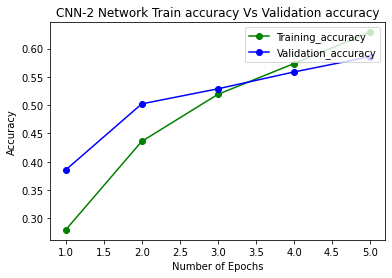

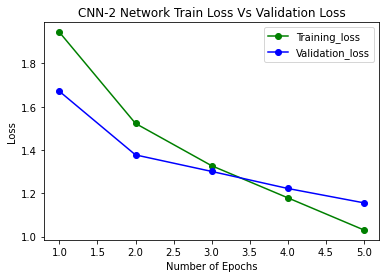

In [ ]:
# Visualization of the training accuracy and Validation accuracy:
train_loss = cnn2_history.history['accuracy']
valid_loss = cnn2_history.history['val_accuracy']

epochs = range(1,6)
plt.plot(epochs, train_loss, marker='o', color='green', label='Training accuracy')
plt.plot(epochs, valid_loss, marker='o', color='blue', label='validation accuracy')

plt.title('CNN-2 Network Train accuracy Vs Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['Training_accuracy','Validation_accuracy'],loc='upper right')
plt.show()


# Visualization of the training loss and Validation loss:
train_loss = cnn2_history.history['loss']
valid_loss = cnn2_history.history['val_loss']

epochs = range(1,6)
#plt.ylim(1.4, 2.2)
plt.plot(epochs, train_loss, marker='o', color='green', label='Training loss')
plt.plot(epochs, valid_loss, marker='o', color='blue', label='validation loss')

plt.title('CNN-2 Network Train Loss Vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Training_loss','Validation_loss'],loc='upper right')
plt.show()



In [ ]:
# Evaluating the testing results:
score = cnn2_network.evaluate(X_test_cnn2, y_test_cnn2, batch_size=32, verbose=1)

print(cnn2_network.metrics_names)
print(score)
print("CNN-2 model - Testing loss = {:2f}".format(score[0]))
print("CNN-2 model - Testing accuracy = {:2f}%".format(score[1]*100))

157/157 [==============================] - 4s 28ms/step - loss: 2.1073 - accuracy: 0.5998
['loss', 'accuracy']
[2.1073391437530518, 0.5997999906539917]
CNN-2 model - Testing loss = 2.107339
CNN-2 model - Testing accuracy = 59.979999%


In [ ]:
import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

# Transform label indices to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train,y_train, epochs=15, batch_size=32, verbose=2, validation_split=0.2)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)
Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 9s - loss: 1.8229 - accuracy: 0.3416 - val_loss: 1.8044 - val_accuracy: 0.3583
Epoch 2/15
 - 9s - loss: 1.6568 - accuracy: 0.4046 - val_loss: 1.6296 - val_accuracy: 0.4200
Epoch 3/15
 - 9s - loss: 1.5801 - accuracy: 0.4336 - val_loss: 1.5874 - val_accuracy: 0.4324
Epoch 4/15
 - 9s - loss: 1.5389 - accuracy: 0.4507 - val_loss: 1.6561 - val_accuracy: 0.4030
Epoch 5/15
 - 9s - loss: 1.5066 - accuracy: 0.4604 - val_loss: 1.5788 - val_accuracy: 0.4328
Epoch 6/15
 - 9s - loss: 1.4762 - accuracy: 0.4685 - val_loss: 1.5556 - val_accuracy: 0.4488
Epoch 7/15
 - 9s - loss: 1.4534 - accuracy: 0.4790 - val_loss: 1.5769 - val_accuracy: 0.4321
Epoch 8/15
 - 9s - loss: 1.4267 - accuracy: 0.4884 - val_loss: 1.5311 - val_accuracy: 0.4658
Epoch 9/15
 - 9s - loss: 1.4079 - accuracy: 0.4945 - val_loss: 1.5091 - val_accuracy: 0.4661
Epoch 10/